# Python数据分析过程（基础版）

此篇文章介绍了如何用Python进行数据分析，主要目的是理清思路、梳理逻辑，涉及的也是一些常用的命令代码。

## 1. 读取 CSV 文件
先尝试读取一份银行贷款数据集（ csv 文件，编的实验数据不代表真实性）。使用的是 `read_csv()` 方法，用于将数据从 csv 文件加载到 Pandas 数据框中。只需要指定数据的文件路径。我已经将 `bankloan.csv` 存储在与 Jupyter notebook 相同的目录下，所以只需要提供文件名，否则需要添加 `绝对路径` 。

In [1]:
import pandas as pd

df = pd.read_csv('bankloan.csv', encoding='gbk')

`head()` 是一个有用的功能，可以在数据框上调用，用于显示前几行。

In [2]:
df.head() # 默认是显示前5行，也可以显示指定的行数，如df.head(2)只显示前2行

,id,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
0,1,41.0,3.0,17.0,176.0,9.3,11.36,5.01,1
1,2,27.0,1.0,10.0,31.0,17.3,1.36,4.00,0
2,3,40.0,1.0,15.0,55.0,5.5,0.86,2.17,0
3,4,41.0,1.0,15.0,120.0,2.9,2.66,0.82,0
4,5,24.0,2.0,2.0,28.0,17.3,1.79,3.06,1


请记住，CSV 代表逗号分隔值，但这些值实际可用不同的字符、制表符、空格等分隔。例如，如果文件用逗号分隔，仍然可以将 `read_csv()` 与 `sep` 参数一起使用。

In [3]:
df = pd.read_csv('bankloan.csv', encoding='gbk', sep=':')
df.head()

,"id,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约"
0,"1,41,3,17,176,9.3,11.36,5.01,1"
1,"2,27,1,10,31,17.3,1.36,4,0"
2,"3,40,1,15,55,5.5,0.86,2.17,0"
3,"4,41,1,15,120,2.9,2.66,0.82,0"
4,"5,24,2,2,28,17.3,1.79,3.06,1"


明显没有成功，因为 CSV 文件是用逗号分隔的。由于没有冒号，没有被分隔的值，所有值都被读取到一个列！

### 1.1 标题
`read_csv` 的另一个功能是指定文件的哪一行作为标题，而标题指定了列标签。通常第一行是标题，但有时如果文件顶部有额外的元信息，我们希望指定另一行作为标题。可以这样操作。

In [4]:
df = pd.read_csv('bankloan.csv', encoding='gbk', header=2)
df.head()

,2,27,1,10,31,17.3,1.36,4,0
0,3,40.0,1.0,15.0,55.0,5.5,0.86,2.17,0
1,4,41.0,1.0,15.0,120.0,2.9,2.66,0.82,0
2,5,24.0,2.0,2.0,28.0,17.3,1.79,3.06,1
3,6,41.0,2.0,5.0,25.0,10.2,0.39,2.16,0
4,7,39.0,1.0,20.0,67.0,30.6,3.83,16.67,0


这里使用第 3 行作为标题，上面的所有数据都被删除。默认情况下，`read_csv` 使用 header=0，使用第一行作为列标签。
如果文件中不包括列标签，可以使用 `header=None` 防止数据的第一行被误当做列标签。

In [5]:
df = pd.read_csv('bankloan.csv', encoding='gbk', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,id,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
1,1,41,3,17,176,9.3,11.36,5.01,1
2,2,27,1,10,31,17.3,1.36,4,0
3,3,40,1,15,55,5.5,0.86,2.17,0
4,4,41,1,15,120,2.9,2.66,0.82,0


还可以用以下方法自己指定列标签。

In [6]:
labels = ['id', 'age', 'education', 'w_age', 'income', 'debt_ratio', 'cardloan', 'o_loan', 'default']
df = pd.read_csv('bankloan.csv', encoding='gbk', names=labels)
df.head()

,id,age,education,w_age,income,debt_ratio,cardloan,o_loan,default
0,id,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
1,1,41,3,17,176,9.3,11.36,5.01,1
2,2,27,1,10,31,17.3,1.36,4,0
3,3,40,1,15,55,5.5,0.86,2.17,0
4,4,41,1,15,120,2.9,2.66,0.82,0


如果想告诉 pandas，正在替换的数据包含标题行，可以用以下方法指定这一行。

In [7]:
labels = ['id', 'age', 'education', 'w_age', 'income', 'debt_ratio', 'cardloan', 'o_loan', 'default']
df = pd.read_csv('bankloan.csv', encoding='gbk', header=0, names=labels)
df.head()

,id,age,education,w_age,income,debt_ratio,cardloan,o_loan,default
0,1,41.0,3.0,17.0,176.0,9.3,11.36,5.01,1
1,2,27.0,1.0,10.0,31.0,17.3,1.36,4.00,0
2,3,40.0,1.0,15.0,55.0,5.5,0.86,2.17,0
3,4,41.0,1.0,15.0,120.0,2.9,2.66,0.82,0
4,5,24.0,2.0,2.0,28.0,17.3,1.79,3.06,1


### 1.2 索引
除使用默认索引（从 0 递增 1 的整数）之外，还可以将一个或多个列指定为数据框的索引。

In [8]:
df = pd.read_csv('bankloan.csv', encoding='gbk', index_col='id')
df.head()

,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
id,,,,,,,,
1,41.0,3.0,17.0,176.0,9.3,11.36,5.01,1
2,27.0,1.0,10.0,31.0,17.3,1.36,4.00,0
3,40.0,1.0,15.0,55.0,5.5,0.86,2.17,0
4,41.0,1.0,15.0,120.0,2.9,2.66,0.82,0
5,24.0,2.0,2.0,28.0,17.3,1.79,3.06,1


In [9]:
df = pd.read_csv('bankloan.csv', encoding='gbk', index_col=['id', '年龄'])
df.head()

,,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
id,年龄,,,,,,,
1,41.0,3.0,17.0,176.0,9.3,11.36,5.01,1
2,27.0,1.0,10.0,31.0,17.3,1.36,4.00,0
3,40.0,1.0,15.0,55.0,5.5,0.86,2.17,0
4,41.0,1.0,15.0,120.0,2.9,2.66,0.82,0
5,24.0,2.0,2.0,28.0,17.3,1.79,3.06,1


这个功能可单独用于进行多种操作，例如解析日期、填充空值、跳行等。可以在  `read_csv()` 后面进行不同步骤，实现这些操作。可以在 [这里：pandas 读取csv文档](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) 查看如何用这个功能进行操作。

# 2. 评估和理解数据（建立直觉）
一旦将数据加载到数据框中，Pandas 会非常简单、快速地对数据进行调查。

In [10]:
import pandas as pd
df = pd.read_csv('bankloan.csv', encoding='gbk')
df.head() # 返回数据框中的前几行，默认返回前五行，也可以显示指定的行数，如df.head(2)只显示前两行

,id,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
0,1,41.0,3.0,17.0,176.0,9.3,11.36,5.01,1
1,2,27.0,1.0,10.0,31.0,17.3,1.36,4.00,0
2,3,40.0,1.0,15.0,55.0,5.5,0.86,2.17,0
3,4,41.0,1.0,15.0,120.0,2.9,2.66,0.82,0
4,5,24.0,2.0,2.0,28.0,17.3,1.79,3.06,1


In [11]:
#返回数据框维度的元组
df.shape

(735, 9)

In [12]:
#返回列的数据类型
df.dtypes

id         int64
年龄       float64
教育       float64
工龄       float64
收入       float64
负债率      float64
信用卡负债    float64
其他负债     float64
违约         int64
dtype: object

In [13]:
# 有些情况下诊断的数据类型是对象，但进一步的调查显示，它是字符串
# type(df['xxxx'][0])

Pandas 实际上将 [指针](https://en.wikipedia.org/wiki/Pointer_(computer_programming) 存储为数据框和序列中的字符串，因此，数据类型是 `object` 而不是 `str`。了解这一点对数据分析来说并不重要，只需知道字符串在 Pandas 中以对象的形式呈现。

In [14]:
# 显示数据框的简明摘要，包括每列非空值的数量
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
id       735 non-null int64
年龄       734 non-null float64
教育       727 non-null float64
工龄       724 non-null float64
收入       719 non-null float64
负债率      721 non-null float64
信用卡负债    728 non-null float64
其他负债     734 non-null float64
违约       735 non-null int64
dtypes: float64(7), int64(2)
memory usage: 51.8 KB


In [15]:
# 返回每列数据的有效描述性统计
df.describe()

,id,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
count,735.000000,734.000000,727.000000,724.000000,719.000000,721.000000,728.000000,734.000000,735.000000
mean,364.542857,34.892371,1.711142,8.472376,45.853964,10.199029,1.537569,3.037657,0.269388
std,214.903116,8.037641,0.922134,6.722565,36.828097,6.761734,2.096942,3.175418,0.443944
min,1.000000,20.000000,1.000000,0.000000,14.000000,0.400000,0.010000,0.050000,0.000000
25%,173.500000,29.000000,1.000000,3.000000,24.000000,5.200000,0.370000,1.070000,0.000000
50%,359.000000,34.000000,1.000000,7.000000,34.000000,8.600000,0.855000,1.990000,0.000000
75%,551.500000,40.750000,2.000000,13.000000,55.500000,13.800000,1.870000,3.810000,1.000000
max,735.000000,56.000000,5.000000,31.000000,446.000000,41.300000,20.560000,23.100000,1.000000


In [16]:
# `.tail()` 返回最后几行，但是也可以指定你希望返回的行数
df.tail(2)

,id,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
733,734,24.0,2.0,0.0,16.0,7.3,0.02,1.14,0
734,735,47.0,1.0,31.0,253.0,7.2,9.31,8.91,0


## 2.1 在 Pandas 中进行数据索引和选择
有时我们只需要分析其中的部分列，因此需要对数据进行列的选择，主要有以下几种办法。假设我们需要筛选出从 `id` 到`收入` 列的数据。

In [17]:
# 查看每列的索引号和标签
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 年龄
2 教育
3 工龄
4 收入
5 负债率
6 信用卡负债
7 其他负债
8 违约


可以使用 `loc` 和 `iloc` 选择数据。可以点击  [这里](https://pandas.pydata.org/pandas-docs/stable/indexing.html)，了解  `loc` 和 `iloc` 的更多信息。`loc` 使用行标签或列标签选择数据，而 `iloc` 使用索引号。

In [18]:
# 使用loc选择从 'id' 到 '收入' 列
df1 = df.loc[:,'id':'收入']
df1.head()

,id,年龄,教育,工龄,收入
0,1,41.0,3.0,17.0,176.0
1,2,27.0,1.0,10.0,31.0
2,3,40.0,1.0,15.0,55.0
3,4,41.0,1.0,15.0,120.0
4,5,24.0,2.0,2.0,28.0


In [19]:
# 使用iloc重复以上步骤
df1 = df.iloc[:,:5]
df1.head()

,id,年龄,教育,工龄,收入
0,1,41.0,3.0,17.0,176.0
1,2,27.0,1.0,10.0,31.0
2,3,40.0,1.0,15.0,55.0
3,4,41.0,1.0,15.0,120.0
4,5,24.0,2.0,2.0,28.0


## 2.2 在 Pandas 中选择多个范围
选择上述数据框的列非常简单，因为需要选择的列都在一起。但如果所需列是分开的，无法在一个范围内指定全部，就需要用其他方法。[点击这里：stackoverflow 链接](https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe) 学习如何在 Pandas 中选择多个范围。

假设我们需要筛选出 `id` 、`年龄`、 `收入`、 `其他负债` 列的数据。

In [20]:
import numpy as np
# 使用 np.r_ 方法
df2 = df.iloc[:, np.r_[0:2, 4, 7]]
df2.head()

,id,年龄,收入,其他负债
0,1,41.0,176.0,5.01
1,2,27.0,31.0,4.00
2,3,40.0,55.0,2.17
3,4,41.0,120.0,0.82
4,5,24.0,28.0,3.06


In [21]:
# 另一种方法
df2 = df[['id', '年龄', '收入', '其他负债']]
df2.head()

,id,年龄,收入,其他负债
0,1,41.0,176.0,5.01
1,2,27.0,31.0,4.00
2,3,40.0,55.0,2.17
3,4,41.0,120.0,0.82
4,5,24.0,28.0,3.06


## 3. 清理数据
练习缺失值和重复值的处理。

In [22]:
# 读入 `bankloan.csv`
import pandas as pd
df = pd.read_csv('bankloan.csv', encoding='gbk')

## 3.1 缺失值

In [23]:
# 用 info() 检查哪些列有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
id       735 non-null int64
年龄       734 non-null float64
教育       727 non-null float64
工龄       724 non-null float64
收入       719 non-null float64
负债率      721 non-null float64
信用卡负债    728 non-null float64
其他负债     734 non-null float64
违约       735 non-null int64
dtypes: float64(7), int64(2)
memory usage: 51.8 KB


In [24]:
# 用pandas的fillna函数将平均值填充到各空值处
df.fillna(df.mean(), inplace=True) #inplace参数为True时表示在源表上进行更改，False时不会改变源表

# 用 info() 确认修改
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
id       735 non-null int64
年龄       735 non-null float64
教育       735 non-null float64
工龄       735 non-null float64
收入       735 non-null float64
负债率      735 non-null float64
信用卡负债    735 non-null float64
其他负债     735 non-null float64
违约       735 non-null int64
dtypes: float64(7), int64(2)
memory usage: 51.8 KB


## 3.2 重复值

In [25]:
# 检查数据中的重复
sum(df.duplicated())

41

In [26]:
# 丢弃重复
df.drop_duplicates(inplace=True) #此处inplace参数为True时改变源表格，为False时不改变源表格

In [27]:
# 再次检查数据中的重复，确认修改
sum(df.duplicated())

0

## 3.3 数据类型的转化

In [28]:
df['年龄'] = df['年龄'].astype(int)
df['教育'] = df['教育'].astype(int)
df['工龄'] = df['工龄'].astype(int)

In [29]:
# 用 info() 确认修改
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 734
Data columns (total 9 columns):
id       694 non-null int64
年龄       694 non-null int64
教育       694 non-null int64
工龄       694 non-null int64
收入       694 non-null float64
负债率      694 non-null float64
信用卡负债    694 non-null float64
其他负债     694 non-null float64
违约       694 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.2 KB


附注：如果表格中有时间信息，可以使用pandas的to_datetime函数将某列转换为datetime型<br>
df['timestamp'] = pd.to_datetime(df['timestamp'])<br>
注意⚠️：再重新从csv中导入时还是原来的数据类型，需要再次转换，或者在read_csv函数中使用parsedates之类的参数<br>

## 3.4 重命名列
在绘制图形时，多数不支持中文，因此可以重命名列，使用的是 `rename` 方法。

In [30]:
df1 = df.rename(columns={'年龄':'age', '教育':'education', '工龄':'w_age', '收入':'income', 
                         '负债率':'debt_ratio', '信用卡负债':'cardloan', '其他负债':'o_loan', '违约':'default'})
df1.head()

,id,age,education,w_age,income,debt_ratio,cardloan,o_loan,default
0,1,41,3,17,176.0,9.3,11.36,5.01,1
1,2,27,1,10,31.0,17.3,1.36,4.00,0
2,3,40,1,15,55.0,5.5,0.86,2.17,0
3,4,41,1,15,120.0,2.9,2.66,0.82,0
4,5,24,2,2,28.0,17.3,1.79,3.06,1


# 4. 得出结论
由于此篇为基础版，因此没有涉及过多的数据分析、机器学习的方法，主要回答以下的几个问题得出分析的结论。<br>
1.30岁（含）以下人群的总收入与信用卡总负债情况<br>
2.30岁（含）以下人群、31岁到39岁及40岁（含）以上人群的总收入总比情况

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fa63e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b0ea3c8>]], dtype=object)

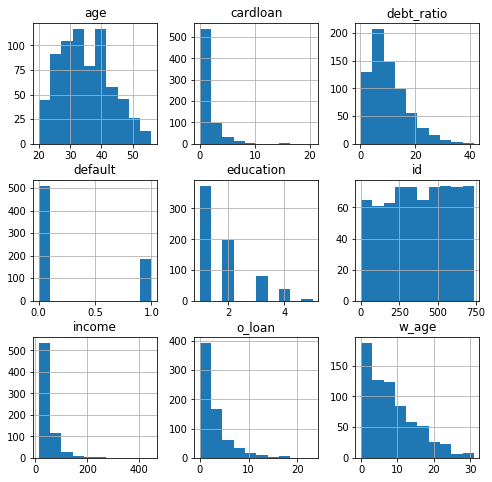

In [31]:
% matplotlib inline
# 探索数据，为所有的变量绘制柱状图，了解大概分布情况
df1.hist(figsize=(8, 8))

In [32]:
# 30岁（含）以下人群的总收入与信用卡总负债情况
df2 = df1[df1['age'] <= 30]
print("30岁（含）以下人群的总收入约为 %d 元。" % df2['income'].sum())
print("30岁（含）以下人群的信用卡总负债约为 %d 元。" % df2['cardloan'].sum())

30岁（含）以下人群的总收入约为 6806 元。
30岁（含）以下人群的信用卡总负债约为 219 元。


In [33]:
# 30岁（含）以下人群、31岁到39岁及40岁（含）以上人群的总收入总比情况
df3 = df1[(df1['age'] > 30) & (df1['age'] < 40)]
df4 = df1[df1['age'] >= 40]

total = df1['income'].sum()
print("0岁（含）以下人群总收入占比为 %.2f 。" % (df2['income'].sum() / total))
print("31岁到39岁人群总收入占比为 %.2f 。" % (df3['income'].sum() / total))
print("40岁（含）以上人群总收入占比为 %.2f 。" % (df4['income'].sum() / total))

0岁（含）以下人群总收入占比为 0.21 。
31岁到39岁人群总收入占比为 0.34 。
40岁（含）以上人群总收入占比为 0.45 。


# 5. 传达结果（创建具有适当标签、颜色和尺寸的图）

Text(0.5,1,'income VS cardloan of age lower than 30')

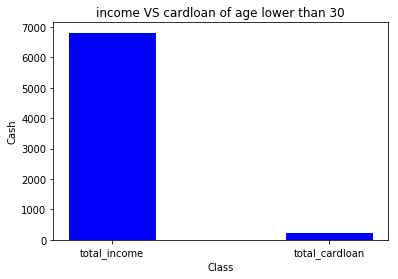

In [34]:
import matplotlib.pyplot as plt

# 30岁（含）以下人群的总收入与信用卡总负债情况
X=['total_income', 'total_cardloan']
Y=[df2['income'].sum(),df2['cardloan'].sum()] 
fig = plt.figure()
plt.bar(X, Y, 0.4, color="blue")
plt.xlabel("Class")
plt.ylabel("Cash")
plt.title("income VS cardloan of age lower than 30")

'\nlabeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置\nautopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数\nshadow，饼是否有阴影\nstartangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看\npctdistance，百分比的text离圆心的距离\n'

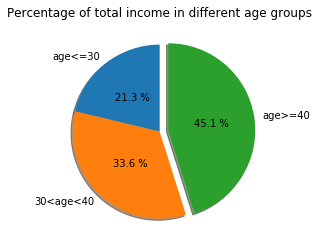

In [35]:
# 30岁（含）以下人群、31岁到39岁及40岁（含）以上人群的总收入总比情况

labels = 'age<=30', '30<age<40', 'age>=40'
fracs = [df2['income'].sum() / total, df3['income'].sum() / total, df4['income'].sum() / total]
explode = [0, 0, 0.1] # 0.1 凸出这部分，
plt.axes(aspect=1)  # Figure is round, otherwise it is an ellipse
plt.pie(x=fracs, labels=labels, explode=explode,autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.5)
plt.title("Percentage of total income in different age groups")
'''
labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
shadow，饼是否有阴影
startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
pctdistance，百分比的text离圆心的距离
'''

# 6. 简单可视化

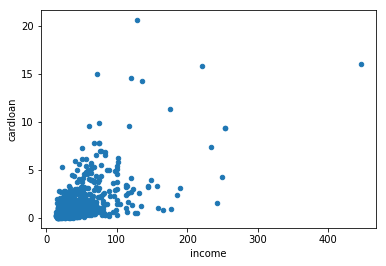

In [36]:
# 绘制收入与信用卡负债之间的关系图
df1.plot(x='income', y='cardloan', kind='scatter')

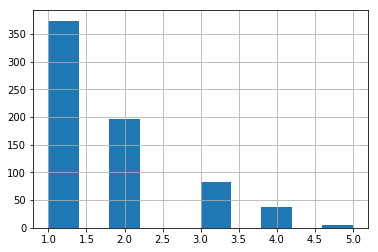

In [37]:
# 绘制学历分布图
df1['education'].hist()

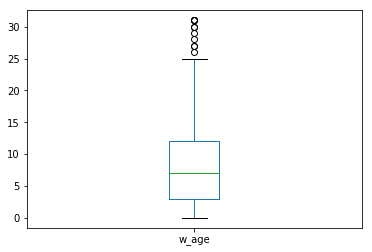

In [38]:
# 绘制工龄变量的箱线图
df1['w_age'].plot(kind='box')